In [26]:
# Libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230  30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 254 254 244  20 

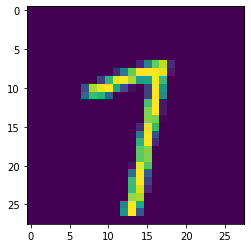

In [27]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

# Loading Dataset            
mnist = tf.keras.datasets.mnist

# Splitting datas for training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# displaying an image from the Dataset
np.set_printoptions(linewidth=200)
plt.imshow(x_train[42])
print(y_train[42])
print(x_train[42])

# Normalization
x_train, x_test = x_train/255.0, x_test/255.0
callbacks = myCallback()

# Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

#Compile model with Loss function and Optimizer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Model fitting
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])


In [28]:
# Evaluate model with test dataset
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0621 - accuracy: 0.9805


[0.06214911534623825, 0.9805]

Enter the image number: 8379
[2.41675124e-08 1.92049754e-09 5.05107073e-06 9.99867558e-01 4.75138266e-13 1.20183126e-04 1.46566248e-09 7.42401198e-08 6.17829255e-06 8.07029039e-07]
3


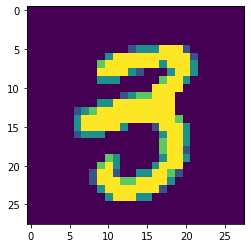

In [35]:
# Model Classification Example
classification = model.predict(x_test)
imgNum = int(input("Enter the image number: "))
print(classification[imgNum])
plt.imshow(x_test[imgNum])
print(y_test[imgNum])